In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Pearson's correlation factor
---

Given a random variable $X$, from which a random variable is created by $Y = m X + Z$, where $Z$ is a random variable representing the noise. We assume that:

* the signal X and the noise Z are independent
* X has mean 0 and variance $\sigma_x^2$
* Z has mean 0 and variance $\sigma_z^2$
* Y has mean 0 and variance $\sigma_y^2 = m^2 \sigma_x^2 + \sigma_z^2$ (variance of independent variables are added)

<br>

### Improved guessing

Y has a dependency to X. Thus, if we have some information on the value of X, we can have a better estimation of Y than if we did not have any information on X.

* Without knowing X, the best guess we could do for Y would be: $Y_p = E[Y]$
* With knowledge of Y, the best guess we can do for Y is: $Y_p = E[Y|X]$


If $E[Y|X] = E[Y]$, then there is no correlation between X and Y. The variance of the value around $Y_p$ is the same as the variance of $Y$.

If $E[Y|X] \neq E[Y]$, then there is a correlation between X and Y. The variance of the value around $Y_p$ should be reduced to the variance of the noise $Z$ (in fact, in case of regression tasks, the error can be decomposed as: $noise_{data} + bias_{model}^2 + var_{model}$).

<br>

### Correlation factor

This linear dependency can be estimated by computing a correlation factor between X and Y:

$r= \frac{m \sigma_x}{\sigma_y} = \frac{m \sigma_x}{\sqrt{m^2 \sigma_x^2 + \sigma_z^2}}$

It measure the ratio of variance of $Y$ knowing $X$ over the variance of $Y$ not knowing $X$. Said diffently, it measures the improvement of precision (the reduction of error) introduced by the knowledge of $X$.

* A correlation factor of 1 or -1 corresponds to a value of $\sigma_z = 0$ (no noise and perfect prediction of $Y$ from $X$)
* A correlation factor of 0 corresponds to $m = 0$ (no linear relationship between X and Y exist).

From the correlation factor, we can compute the linear factor $m=r \frac{\sigma_y}{\sigma_x}$ in case we want to do a regression.

<br>

### Practical estimation

In general, we do not have the value of $m$, so the correlation factor $r$ above cannot be computed as shown above.

Instead we compute it using the covariance: $r= \frac{Cov[X,Y]}{\sigma_x \sigma_y}$, where the covariance:

* is given by: $E[(X-\bar{X})(Y-\bar{Y})] = E[XY] - E[X]E[Y]$
* can be estimated by: $\frac{1}{N-1} \sum_{i=1}^n (x_i - \bar{x_i}) (y_i - \bar{y_i})$

If flows from (ignoring the means and based on X and Y being independent):

* $Cov[X,Y] = E[XY] = E[X(mX+Z)] = m E[X^2] + E[XZ] = m \sigma_x^2 + 0$
* $r= \frac{Cov[X,Y]}{\sigma_x \sigma_y} = \frac{m \sigma_x^2}{\sigma_x \sigma_y} = \frac{m \sigma_x}{\sigma_y}$

We can then deduce the factor $m$ (how $Y$ varies in function of $X$) by the formula $m=r \frac{\sigma_y}{\sigma_x} = \frac{Cov[X,Y]}{\sigma_x^2}$.

We can also deduce the reversed factor (how $X$ varies in function of $Y$) by the formula $m=r \frac{\sigma_x}{\sigma_y} = \frac{Cov[X,Y]}{\sigma_y^2}$.

# Example and illustration of "regression toward the mean"
---

Creation of two random variable $X$ and $Y$ with a linear correlation.

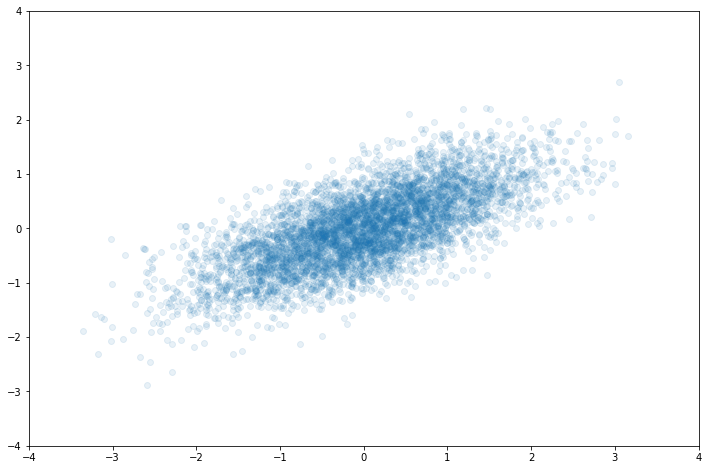

In [2]:
n = 5000
xs = np.random.normal(loc=0.0, scale=1.0, size=n)
ys = 0.5 * xs + np.random.normal(loc=0.0, scale=0.5, size=n)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Computation of the variance of $X$ and $Y$, their standard deviations, the covariance and correlation factor between the two variables.

In [13]:
mean_x = 1 / n * np.sum(xs)
mean_y = 1 / n * np.sum(ys)
print("sample mean of X:", mean_x)
print("sample mean of Y:", mean_y)

var_x = 1 / (n - 1) * ((xs - mean_x).T @ (xs - mean_x))
var_y = 1 / (n - 1) * ((ys - mean_y).T @ (ys - mean_y))
print("sample variance of X:", var_x)
print("sample variance of Y:", var_y)

std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)

cov = 1 / (n - 1) * ((ys - mean_y).T @ (xs - mean_x))
cor = cov / (std_x * std_y)
print("sample covariance: ", cov)
print("correlation:", cor)

sample mean of X: -0.0034133638506651134
sample mean of Y: -0.004572518449392468
sample variance of X: 0.9816268328791856
sample variance of Y: 0.4967999549091419
sample covariance:  0.4905495170833018
correlation: 0.7024555820303711


### Regression lines

We can now display the regression lines:

* $m1$ (how $Y$ varies in function of $X$)
* $m2$ (how $X$ varies in function of $Y$)
* $m$ (the ratio of standard deviation between X and Y)

0.499731161223948
0.9874186022682243


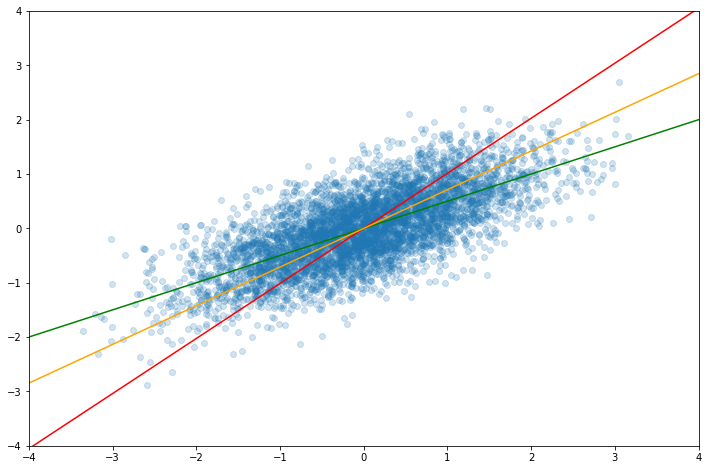

In [16]:
m1 = cov / var_x
m2 = cov / var_y
m = std_x / std_y
print(m1)
print(m2)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m2, 4/m2], color='red')
plt.plot([-4, 4], [-4/m, 4/m], color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

This illustrate the notion of "regression toward the mean":

TODO

# Mutual information (information theory)
---